# Setup and Import

In [37]:
import os
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing import image

# Functions

In [183]:
def result_plots(df, title, vline=None, ylim=(0, 2), x_min=0, x_max=None, x_tick=None):
    fig, axs = plt.subplots(figsize=(5, 5))
    styles = ["r-", "r-.", "b-", "b-."]
    tags = ["loss", "accuracy", "val_loss", "val_accuracy"]
    axs.plot(
        df[tags[0]],
        styles[0],
        df[tags[1]],
        styles[1],
        df[tags[2]],
        styles[2],
        df[tags[3]],
        styles[3],
    )
    axs.set_title(title)
    axs.legend(["Train Loss", "Train Acc", "Test Loss", "Test Acc"])
    axs.grid(axis="y")
    axs.set_ylim(ylim)
    if x_max is None:
        x_max = len(df)
    if x_tick is None:
        x_tick = 25
    axs.set_xlim(x_min - 2, x_max)
    axs.set_xticks(range(x_min, x_max + 2, x_tick))
    if vline != None:
        axs.axvline(x=vline, ls="--", c="k", lw=1)
    plt.show()

In [178]:
def get_results(rel_dir):
    cwd = os.getcwd()
    files = os.listdir(cwd + rel_dir)
    results = dict()
    for i, file in enumerate(files):
        results[file] = pd.read_csv(cwd + rel_dir + files[i])
    return results

# Introductory data

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
[2628, 2745, 2957, 3037, 2784, 2883] 17034
total number of features per image: 67500


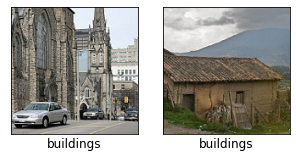

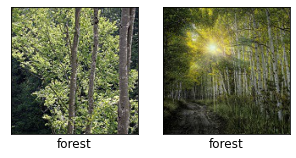

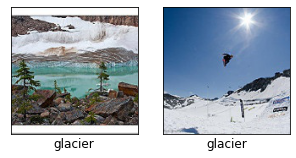

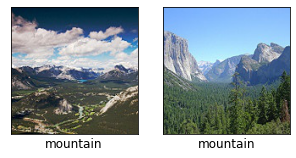

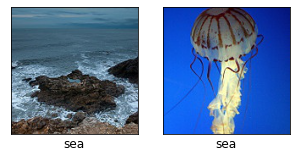

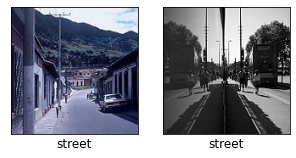

In [4]:
cwd = os.getcwd()
target_dir = cwd + "//Data Set//Data//"
class_names = os.listdir(target_dir)
class_len = list()
img_selection = dict()

for i, cl in enumerate(class_names):
    class_files = os.listdir(target_dir + cl)
    class_len.append(len(class_files))
    img_selection[cl] = [
        image.load_img(
            target_dir + cl + "//" + class_files[random.randint(1, len(class_files))]
        ),
        image.load_img(
            target_dir + cl + "//" + class_files[random.randint(1, len(class_files))]
        ),
    ]

total_len = sum(class_len)
print(class_names)
print(class_len, total_len)
print("total number of features per image:", 150 * 150 * 3)


for cl, imgs in img_selection.items():
    fig = plt.figure(figsize=(5, 5))
    for idx, img in enumerate(imgs):
        plt.subplot(1, 2, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(cl, size=12)
    plt.show()

# Results comparison

## A

In [28]:
results_1 = get_results("\\Results\\A\\")

In [29]:
best = dict()
acc = dict()
cre = dict()

colnames = ["A.0", "A.1", "A.2", "A.3"]

for key, df in results_1.items():
    safe_zone = df.loc[df["val_loss"] > df["loss"]]
    min_epoch = min(safe_zone.index)
    best_epoch = df["val_accuracy"].idxmax()
    best[key] = [df["val_loss"].min(), df["val_accuracy"].max(), min_epoch, best_epoch]

    acc[key] = df["val_accuracy"].iloc[50:] * 100
    cre[key] = df["val_loss"]

acc = pd.DataFrame(acc)
acc.columns = colnames
acc_melt = pd.melt(acc)

cre = pd.DataFrame(cre)
cre.columns = colnames
cre_melt = pd.melt(cre)

best = pd.DataFrame(
    best, index=["Test Loss", "Test Accuracy", "Safe Zone", "Best Epoch"]
).transpose()
best.index = colnames
best.transpose()

,A.0,A.1,A.2,A.3
Test Loss,0.599972,0.556997,0.717201,0.799731
Test Accuracy,0.790247,0.808167,0.742068,0.701234
Safe Zone,1.000000,3.000000,5.000000,6.000000
Best Epoch,188.000000,173.000000,195.000000,166.000000


[78.21309144872467, 78.21309144872467, 79.83626548868378, 79.60370990523396, 79.60370990523396, 82.02966240158977, 72.87560383810387, 72.87560383810387, 75.53803046212806, 69.05481744467248, 69.05481744467248, 71.1919553214408]


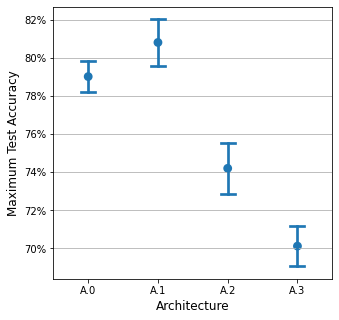

In [30]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(
    x="variable",
    y="value",
    data=acc_melt,
    ci="sd",
    join=False,
    capsize=0.2,
    estimator=max,
)

yticks = mtick.PercentFormatter(decimals=0, symbol="%")
ax.yaxis.set_major_formatter(yticks)

lower = [line.get_ydata().min() for line in ax.lines]

plt.grid(axis="y")
plt.xlabel("Architecture", size=12)
plt.ylabel("Maximum Test Accuracy", size=12)
print(lower)
plt.show()

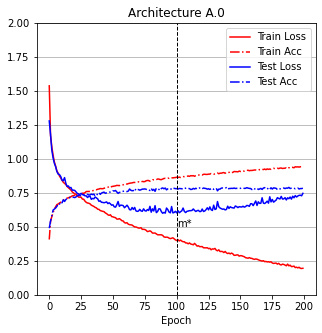

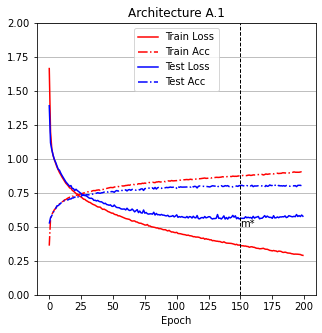

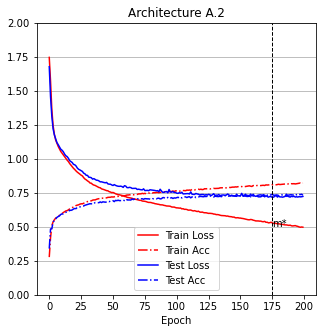

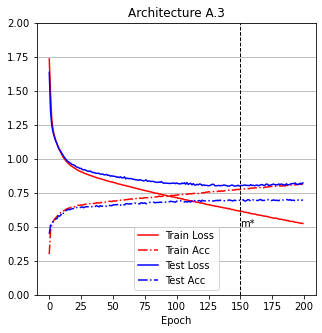

In [33]:
opt_epoch = [100, 150, 175, 150]
i = 0
for key, df in results_1.items():
    result_plots(df, "Architecture A." + str(i), opt_epoch[i])
    i += 1

## B

In [42]:
results_2 = get_results("\\Results\\B\\")

In [57]:
best = dict()
acc = dict()
cre = dict()

colnames = ["B.0", "B.1", "B.2", "B.3", "B.4", "B.5"]

for key, df in results_2.items():
    safe_zone = df.loc[df["val_loss"] > df["loss"]]
    min_epoch = min(safe_zone.index)
    best_epoch = df["val_accuracy"].idxmax()
    best[key] = [df["val_loss"].min(), df["val_accuracy"].max(), min_epoch, best_epoch]

    acc[key] = df["val_accuracy"].iloc[150:] * 100
    cre[key] = df["val_loss"]

acc = pd.DataFrame(acc)
acc.columns = colnames
acc_melt = pd.melt(acc)

cre = pd.DataFrame(cre)
cre.columns = colnames
cre_melt = pd.melt(cre)

best = pd.DataFrame(
    best, index=["Test Loss", "Test Accuracy", "Safe Zone", "Best Epoch"]
).transpose()
best.index = colnames
best.transpose()

,B.0,B.1,B.2,B.3,B.4,B.5
Test Loss,0.561633,0.558803,0.521879,0.607271,0.548280,0.519915
Test Accuracy,0.801998,0.813161,0.817861,0.792597,0.806404,0.814042
Safe Zone,5.000000,12.000000,61.000000,4.000000,8.000000,31.000000
Best Epoch,110.000000,135.000000,198.000000,95.000000,72.000000,130.000000


[79.78217950010261, 79.78217950010261, 80.61735281801262, 80.9346754954431, 80.9346754954431, 81.63876934784913, 81.39600113704749, 81.39600113704749, 82.17626258060388, 77.56013146216839, 77.56013146216839, 78.84410151665242, 79.76037565105638, 79.76037565105638, 80.46289381152907, 80.80056843495153, 80.80056843495153, 81.36159243846156]


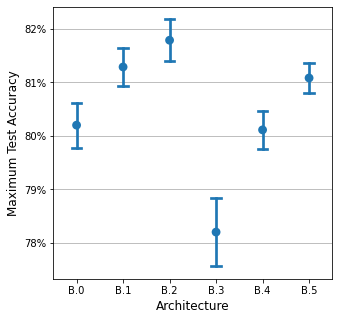

In [58]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(
    x="variable",
    y="value",
    data=acc_melt,
    ci="sd",
    join=False,
    capsize=0.2,
    estimator=max,
)

yticks = mtick.PercentFormatter(decimals=0, symbol="%")
ax.yaxis.set_major_formatter(yticks)

lower = [line.get_ydata().min() for line in ax.lines]

plt.grid(axis="y")
plt.xlabel("Architecture", size=12)
plt.ylabel("Maximum Test Accuracy", size=12)
print(lower)
plt.show()

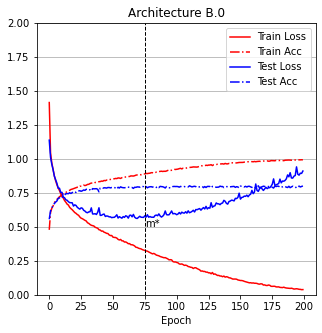

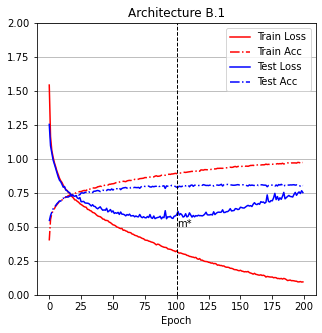

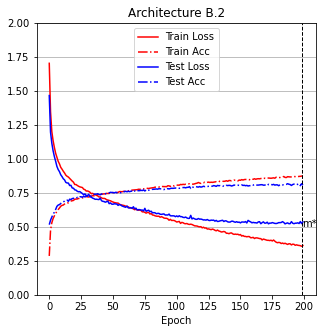

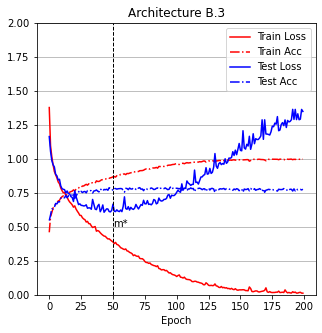

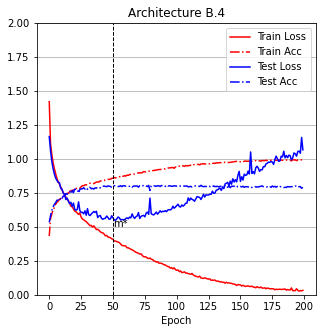

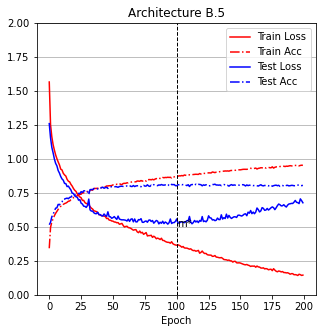

In [54]:
opt_epoch = [75, 100, 198, 50, 50, 100]
i = 0
for key, df in results_2.items():
    result_plots(df, "Architecture B." + str(i), opt_epoch[i])
    i += 1

## C

In [79]:
results_3 = get_results("\\Results\\C\\")

In [80]:
best = dict()
acc = dict()
cre = dict()

colnames = ["C.0", "C.1", "C.2", "C.3", "C.4"]

for key, df in results_3.items():
    safe_zone = df.loc[df["val_loss"] > df["loss"]]
    min_epoch = min(safe_zone.index)
    best_epoch = df["val_accuracy"].idxmax()
    best[key] = [df["val_loss"].min(), df["val_accuracy"].max(), min_epoch, best_epoch]

    acc[key] = df["val_accuracy"].iloc[150:] * 100
    cre[key] = df["val_loss"]

acc = pd.DataFrame(acc)
acc.columns = colnames
acc_melt = pd.melt(acc)

cre = pd.DataFrame(cre)
cre.columns = colnames
cre_melt = pd.melt(cre)

best = pd.DataFrame(
    best, index=["Test Loss", "Test Accuracy", "Safe Zone", "Best Epoch"]
).transpose()
best.index = colnames
best.transpose()

,C.0,C.1,C.2,C.3,C.4
Test Loss,0.350062,0.353087,0.340133,0.332161,0.335186
Test Accuracy,0.850136,0.860127,0.857402,0.871026,0.862852
Safe Zone,8.000000,35.000000,2.000000,8.000000,180.000000
Best Epoch,160.000000,167.000000,27.000000,282.000000,282.000000


[84.61297682706375, 84.61297682706375, 85.41426726397019, 85.68495557688139, 85.68495557688139, 86.34047462560274, 84.30453881366907, 84.30453881366907, 85.17775193111243, 86.68578698971785, 86.68578698971785, 87.51948043963395, 85.84108360481699, 85.84108360481699, 86.72931186484854]


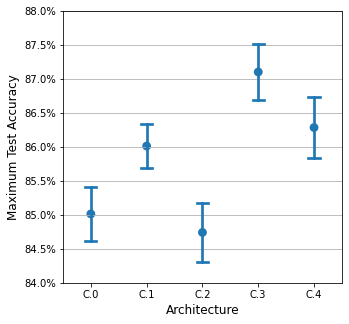

In [81]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(
    x="variable",
    y="value",
    data=acc_melt,
    ci="sd",
    join=False,
    capsize=0.2,
    estimator=max,
)

yticks = mtick.PercentFormatter(decimals=1, symbol="%")
ax.yaxis.set_major_formatter(yticks)

lower = [line.get_ydata().min() for line in ax.lines]

plt.grid(axis="y")
plt.ylim((84, 88))
plt.xlabel("Architecture", size=12)
plt.ylabel("Maximum Test Accuracy", size=12)
print(lower)
plt.show()

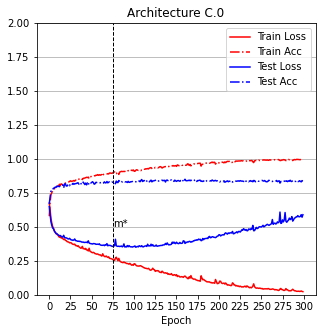

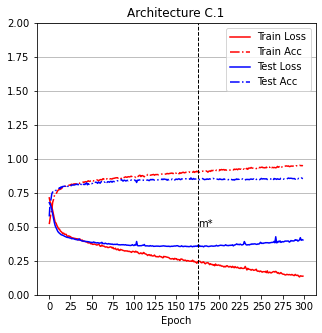

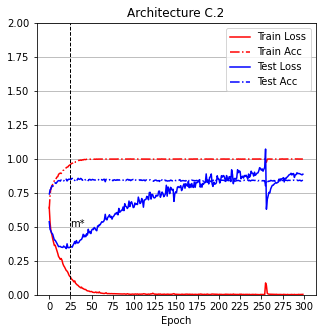

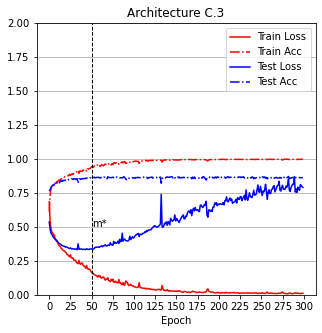

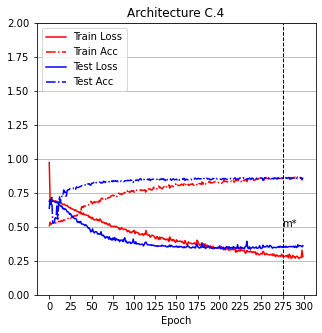

In [84]:
opt_epoch = [75, 175, 25, 50, 275]
i = 0
for key, df in results_3.items():
    result_plots(df, "Architecture C." + str(i), opt_epoch[i])
    i += 1

## D

In [187]:
results_4 = get_results("\\Results\\D\\")

In [188]:
best = dict()
acc = dict()
cre = dict()

colnames = ["D.0", "D.1"]

for key, df in results_4.items():
    safe_zone = df.loc[df["val_loss"] > df["loss"]]
    min_epoch = min(safe_zone.index)
    best_epoch = df["val_accuracy"].idxmax()
    best[key] = [df["val_loss"].min(), df["val_accuracy"].max(), min_epoch, best_epoch]

    acc[key] = df["val_accuracy"].iloc[150:] * 100
    cre[key] = df["val_loss"]

acc = pd.DataFrame(acc)
acc.columns = colnames
acc_melt = pd.melt(acc)

cre = pd.DataFrame(cre)
cre.columns = colnames
cre_melt = pd.melt(cre)

best = pd.DataFrame(
    best, index=["Test Loss", "Test Accuracy", "Safe Zone", "Best Epoch"]
).transpose()
best.index = colnames
best.transpose()

,D.0,D.1
Test Loss,0.338605,0.340010
Test Accuracy,0.858932,0.873957
Safe Zone,81.000000,25.000000
Best Epoch,185.000000,187.000000


[85.5988907297097, 85.5988907297097, 86.18741755886452, 86.85106330540272, 86.85106330540272, 87.94026083323864]


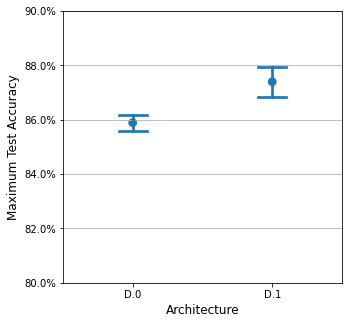

In [190]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
sns.pointplot(
    x="variable",
    y="value",
    data=acc_melt,
    ci="sd",
    join=False,
    capsize=0.2,
    estimator=max,
)

yticks = mtick.PercentFormatter(decimals=1, symbol="%")
ax.yaxis.set_major_formatter(yticks)

lower = [line.get_ydata().min() for line in ax.lines]

plt.grid(axis="y")
plt.ylim(80, 90)
plt.xlabel("Architecture", size=12)
plt.ylabel("Maximum Test Accuracy", size=12)
print(lower)
plt.show()

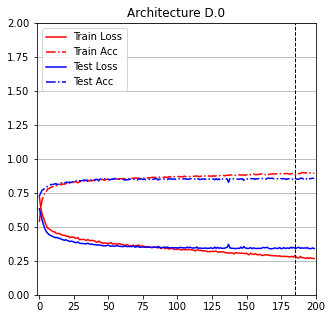

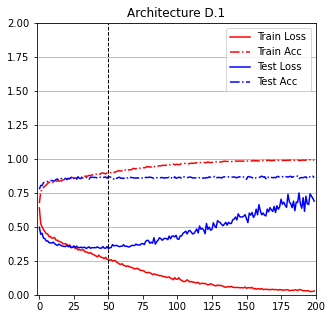

In [194]:
opt_epoch = [185, 50]
i = 0
for key, df in results_4.items():
    result_plots(
        df,
        "Architecture D." + str(i),
        vline=opt_epoch[i]
    )
    i += 1